# Pandas as a toolbox

In [12]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

## This is a header

### run the following command once on a terminal to install pandasql
### pip install pandasql

In [14]:
try:
    import pandasql as ps
except:
    os.system("pip install pandasql")

In [3]:
df = pd.read_csv('data/iris.csv')
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [9]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
tips.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

## Who pay more tips, Male or Female?

## Using SQL

In [15]:
sql = "select sex, avg(tip) from tips where sex = 'Female'"
df = ps.sqldf(sql)
df

,sex,avg(tip)
0,Female,2.833448


In [16]:
sql = "select sex, count(*), avg(tip) from tips group by sex"
print(ps.sqldf(sql))

      sex  count(*)  avg(tip)
0  Female        87  2.833448
1    Male       157  3.089618


## Answer same questions using Pandas syntax

In [12]:
print(tips['tip'].mean())

2.9982786885245902


In [13]:
tips.shape

(244, 7)

In [14]:
tips['sex'] == 'Female'

0       True
1      False
2      False
3      False
4       True
       ...  
239    False
240     True
241    False
242    False
243     True
Name: sex, Length: 244, dtype: bool

In [15]:
print(tips[tips['sex'] == 'Female'] ['tip'].mean())

2.833448275862069


In [16]:
df = tips[tips['sex'] == 'Female']

In [17]:
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Female     No   Sun  Dinner     3
..          ...   ...     ...    ...   ...     ...   ...
226       10.09  2.00  Female    Yes   Fri   Lunch     2
229       22.12  2.88  Female    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[87 rows x 7 columns]


In [18]:
print(tips[tips['sex'] == 'Male'] ['tip'].mean())

3.0896178343949052


## Who pay more tips, Smoker or Non-Smoker?

In [19]:
sql = "select smoker, count(*), avg(tip) from tips group by smoker"
print(ps.sqldf(sql))

  smoker  count(*)  avg(tip)
0     No       151  2.991854
1    Yes        93  3.008710


In [20]:
print(tips.groupby(['smoker']).count())
tips.groupby(['smoker']).mean()

        total_bill  tip  sex  day  time  size
smoker                                       
Yes             93   93   93   93    93    93
No             151  151  151  151   151   151


,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


## When will people tend to pay more Tips, Dinner or Lunch?

In [21]:
sql = "select time, count(*), avg(tip) from tips group by time"
print(ps.sqldf(sql))

     time  count(*)  avg(tip)
0  Dinner       176  3.102670
1   Lunch        68  2.728088


In [22]:
tips.groupby(['time']).mean()

,total_bill,tip,size
time,,,
Lunch,17.168676,2.728088,2.411765
Dinner,20.797159,3.102670,2.630682


## Group By using Pandas with more than one attributes

In [23]:
tips.groupby(['sex','smoker','time']).mean()

total_bill       tip      size
sex    smoker time                                  
Male   Yes    Lunch    17.374615  2.790769  2.153846
              Dinner   23.642553  3.123191  2.595745
       No     Lunch    18.486500  2.941500  2.500000
              Dinner   20.130130  3.158052  2.766234
Female Yes    Lunch    17.431000  2.891000  2.300000
              Dinner   18.215652  2.949130  2.217391
       No     Lunch    15.902400  2.459600  2.520000
              Dinner   20.004138  3.044138  2.655172

In [24]:
tips.groupby(['sex'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [25]:
## Simple plots using Pandas

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

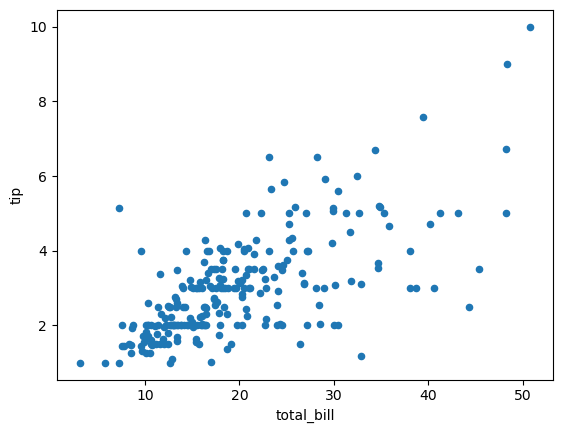

In [26]:
tips.plot.scatter(x='total_bill', y='tip')

In [4]:
tips['tip'].hist(by=tips['sex'])

NameError: name 'tips' is not defined

## Correlation

In [28]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


# What is the average tips as percent of the total bill?

## First we need to calculate an extra "Percent" column

In [29]:
tips['percent'] = tips['tip'] /tips['total_bill']

In [30]:
tips['tips_minus_3'] = tips['tip'] - 3

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent,tips_minus_3
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,-1.99
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,-1.34
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,0.50
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,0.31
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,0.61


In [32]:
tips.percent.mean()

0.16080258172250478

In [33]:
tips.groupby(['sex'])['percent'].mean()

sex
Male      0.157651
Female    0.166491
Name: percent, dtype: float64

## Female tips more generously while they pay less in absolute dollars amount in tip. Why?

## Would it be because Male spend more in dinner or lunch? Let's check

In [34]:
tips.groupby(['sex'])['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

## So one has to be careful what questions you are asking!!!  Answer can be different

## Need an Analytical Mind, not just calculating some numbers or running a library

## Missing Data and Outliers

## Load a similar dataset

In [35]:
tips2 = pd.read_csv('data/tips2.csv')
tips2['percent'] = tips2['tip'] /tips2['total_bill']

In [36]:
tips2.groupby(['sex'])['tip'].mean()

sex
Female    3.206897
Male      3.082722
Name: tip, dtype: float64

In [37]:

tips2.groupby(['sex'])['percent'].mean()

sex
Female    0.181678
Male      0.157651
Name: percent, dtype: float64

## This dataset has Female paying higher tip both in absolute dollar amount as well as in percentage

## But let's check for null and outliers

In [38]:
tips2.isnull().any()

total_bill     True
tip           False
sex           False
smoker        False
day           False
time          False
size          False
percent        True
dtype: bool

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

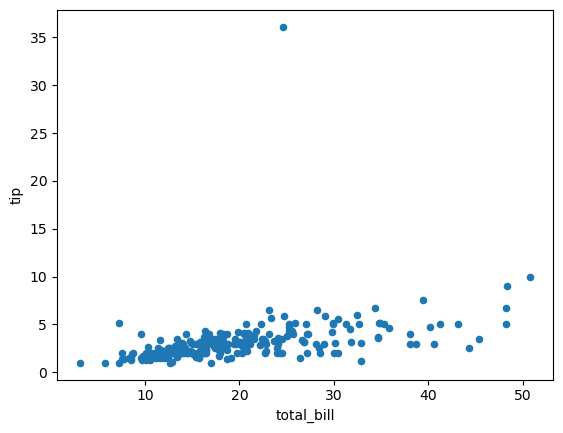

In [39]:
tips2.plot.scatter(x='total_bill', y='tip')

## Other ways to check for outliers

In [40]:
tips2.tip.describe()

count    245.000000
mean       3.126816
std        2.526508
min        1.000000
25%        2.000000
50%        2.880000
75%        3.550000
max       36.100000
Name: tip, dtype: float64

<AxesSubplot:xlabel='tip'>

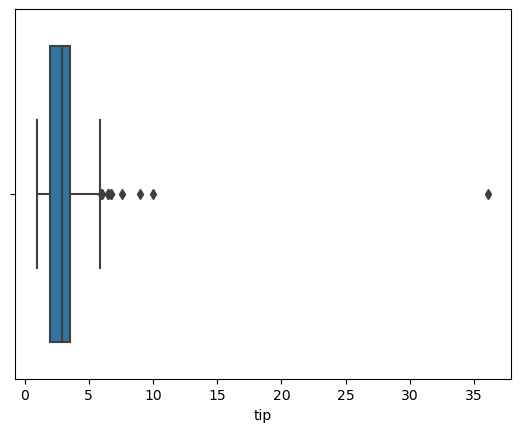

In [41]:
sns.boxplot(x=tips2['tip'])

## Remove outliers and Null

In [42]:
print(tips2.shape)
tips2.dropna(inplace=True)
print(tips2.shape)

(245, 8)
(244, 8)


In [43]:
tips2[ tips2.percent > 0.6]

,total_bill,tip,sex,smoker,day,time,size,percent
4,24.59,36.10,Female,No,Sun,Dinner,4,1.468076
173,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [44]:
tips2 = tips2[tips2.percent < 0.8]
tips2.shape

(243, 8)

## Now Female pay a lower amount of tip

In [45]:
tips2.groupby(['sex'])['tip'].mean()

sex
Female    2.824419
Male      3.089618
Name: tip, dtype: float64

In [46]:
tips2.groupby(['sex'])['percent'].mean()

sex
Female    0.166720
Male      0.157651
Name: percent, dtype: float64